# Financial Well-Being Project: Data Exploration

Survey was administered by the Consumer Financial Protection Bureau (CFPB)

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Load and Review Data

In [2]:
# Option 1: Use if loading data from local folder in Jupyter Notebook
path = Path('../resources/NFWBS_PUF_2016_data.csv')

In [ ]:
# Option 2: Use if loading data from Google Drive in Google Collab
from google.colab import drive
drive.mount('/content/drive')

path = Path('/content/drive/My Drive/Bootcamp/Project-4/NFWBS_PUF_2016_data.csv')

# Load financial well-being survey data
survey_df = pd.read_csv(path, index_col=0)

In [3]:
# Load survey data from CSV file
survey_df = pd.read_csv(path, index_col=0)

# Display sample data
print(f'Records: {len(survey_df)}')
survey_df.head()

Records: 6394


,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,FWB1_4,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
PUF_ID,,,,,,,,,,,,,,,,,,,,,
10350,2,3,5,5,6,55,3,3,3,3,...,1,4,8,0,0,0,0,1,0,0.367292
7740,1,3,6,6,6,51,2,2,3,3,...,1,2,3,0,0,0,0,2,0,1.327561
13699,1,3,4,3,4,49,3,3,3,3,...,1,4,9,0,0,0,1,2,1,0.835156
7267,1,3,6,6,6,49,3,3,3,3,...,1,3,7,0,0,0,0,1,0,1.410871
7375,1,3,4,4,4,49,3,3,3,3,...,1,2,4,0,0,1,0,4,1,4.260668


In [4]:
# Create lists to store columns for research tools administered as part of the survey

# Financial Well-Being Scale developed by CPFB
fwb_scale = ['FWB1_1', 'FWB1_2', 'FWB1_3', 'FWB1_4', 'FWB1_5', 'FWB1_6',
             'FWB2_1', 'FWB2_2', 'FWB2_3', 'FWB2_4', 'FWBscore']

# Financial Skills Scale developed by CPFB
fs_scale = ['FS1_1', 'FS1_2', 'FS1_3', 'FS1_4', 'FS1_5', 'FS1_6', 'FS1_7',
            'FS2_1', 'FS2_2', 'FS2_3', 'FSscore']

# Knoll and Houts Financial Knowledge Scale 
lm_scale = ['FINKNOWL1', 'FINKNOWL2', 'FINKNOWL3',
            'FK1correct', 'FK2correct', 'FK3correct','LMscore',]

# Lusardi and Mitchell Financial Knowledge Scale 
kh_scale = ['KHKNOWL1', 'KHKNOWL2','KHKNOWL3','KHKNOWL4','KHKNOWL5',
            'KHKNOWL6','KHKNOWL7','KHKNOWL8','KHKNOWL9',
            'KH1correct', 'KH2correct','KH3correct', 'KH4correct', 'KH5correct',
            'KH6correct', 'KH7correct', 'KH8correct', 'KH9correct', 'KHscore']

In [15]:
# Create lists to store needed columns in groups/measures
# as defined in the survey report and documentation

# Individual characteristics
ind_measures = ['PPEDUC', 'agecat', 'HEALTH', 'PPETHM', 'PPGENDER']

# Household and family characteristics
house_fam_measures = ['PPMARIT', 'PPREG4', 'HOUSING', 'HOUSESAT', 
                      'KIDS_NoChildren','KIDS_1', 'KIDS_2', 'KIDS_3', 'KIDS_3']

# Income and employment
inc_emp_measures = ['fpl', 'PPINCIMP', 'VOLATILITY', 
                    'EMPLOY1_1', 'EMPLOY1_2', 'EMPLOY1_3', 'EMPLOY1_4',
                    'EMPLOY1_5', 'EMPLOY1_6', 'EMPLOY1_7', 'EMPLOY1_8', 'EMPLOY1_9',
                    'SOCSEC1', 'SOCSEC2', 'SOCSEC3',
                    'BENEFITS_1', 'BENEFITS_2', 'BENEFITS_3',
                    'BENEFITS_4', 'BENEFITS_5', 'MILITARY']

# Savings and safety nets
sav_safety_measures = ['SAVINGSRANGES', 'PRODHAVE_3', 'PRODHAVE_6',
                       'ABSORBSHOCK', 'BORROW_1', 'BORROW_2' ]

# Financial circumsstances
fin_circ_measures = ['ENDSMEET', 'MATHARDSHIP_1', 'MATHARDSHIP_2', 'MATHARDSHIP_3',
                     'MATHARDSHIP_4', 'MATHARDSHIP_5', 'MATHARDSHIP_6']

# Financial behaviors, skills and attitudes
fin_beh_measures = ['PROPPLAN_1', 'PROPPLAN_2', 'PROPPLAN_3', 'PROPPLAN_4',
                    'MANAGE1_1', 'MANAGE1_2', 'MANAGE1_3', 'MANAGE1_4',
                    'SAVEHABIT', 'GOALCONF', 'SCFHORIZON']

### Review Financial Well-Being Scale

In [6]:
fwb_df = survey_df[fwb_scale]
fwb_df.head()

,FWB1_1,FWB1_2,FWB1_3,FWB1_4,FWB1_5,FWB1_6,FWB2_1,FWB2_2,FWB2_3,FWB2_4,FWBscore
PUF_ID,,,,,,,,,,,
10350,3,3,3,3,2,3,2,3,2,4,55
7740,2,2,3,3,3,4,2,2,2,3,51
13699,3,3,3,3,3,3,3,3,3,3,49
7267,3,3,3,3,3,3,3,3,3,3,49
7375,3,3,3,3,3,3,3,3,3,3,49


In [27]:
fwb_df.describe()

,FWB1_1,FWB1_2,FWB1_3,FWB1_4,FWB1_5,FWB1_6,FWB2_1,FWB2_2,FWB2_3,FWB2_4,FWBscore
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000
mean,3.048014,3.191899,2.531279,3.285737,2.771505,3.071942,2.335940,3.388176,2.029246,2.687989,56.034094
std,1.235221,1.114130,1.196235,1.052283,1.269624,1.177299,1.178593,1.267983,1.105532,1.135752,14.154676
min,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000
25%,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,1.000000,3.000000,1.000000,2.000000,48.000000
50%,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,56.000000
75%,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,65.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,95.000000


In [7]:
# Calculate and add weighted FWB score to dataframe
fwb_score = survey_df['FWBscore']
final_wt = survey_df['finalwt']
fwb_score_wt = fwb_score * final_wt
survey_df['FWBscore_wt'] = fwb_score_wt

In [8]:
# Display mean scores and percentiles
print(f"FWB Mean Score: {fwb_score.mean()}")
print(f"FWB Percentiles: \n{fwb_score.quantile([.1, .25, .5, .75, .9])}\n")
print(f"FWB Mean Score (Weighted): {fwb_score_wt.mean()}")
print(f"FWB Percentiles (Weighted): \n{fwb_score_wt.quantile([.1, .25, .5, .75, .9])}")

FWB Mean Score: 56.03409446355959
FWB Percentiles: 
0.10    38.0
0.25    48.0
0.50    56.0
0.75    65.0
0.90    74.0
Name: FWBscore, dtype: float64

FWB Mean Score (Weighted): 54.20231649953065
FWB Percentiles (Weighted): 
0.10    24.753388
0.25    32.990588
0.50    46.171876
0.75    66.921936
0.90    91.481102
dtype: float64


In [10]:
# Check for negative values: -1 = refused to answer, -4 = response not entered in database
# Code Ref: https://stackoverflow.com/questions/36155942/need-count-of-negative-values-in-a-dataframe
fwb_df.lt(0).sum()

FWB1_1      11
FWB1_2      11
FWB1_3       9
FWB1_4      11
FWB1_5      13
FWB1_6       9
FWB2_1      10
FWB2_2      14
FWB2_3      11
FWB2_4      12
FWBscore     5
dtype: int64

In [11]:
# Review rows with negative values
fwb_df[fwb_df.values < 0].groupby('PUF_ID').min()

,FWB1_1,FWB1_2,FWB1_3,FWB1_4,FWB1_5,FWB1_6,FWB2_1,FWB2_2,FWB2_3,FWB2_4,FWBscore
PUF_ID,,,,,,,,,,,
7123,3,-1,5,-1,5,3,3,-1,4,-1,39
7197,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7214,3,3,3,3,3,3,-1,-1,-1,-1,50
7259,-1,5,-1,-1,-1,-1,-1,-1,-1,-1,62
7305,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7938,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7982,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
9050,1,-1,4,-1,-1,4,4,-1,-1,-1,37
9338,-1,3,2,3,3,2,2,3,2,2,58


### Review Other Scales

In [29]:
# Financial Skills Scale
fs_df = survey_df[fs_scale]
print(fs_df.lt(0).sum())
fs_df.describe()

FS1_1      12
FS1_2      11
FS1_3      12
FS1_4      10
FS1_5      11
FS1_6      10
FS1_7       8
FS2_1      14
FS2_2      14
FS2_3      14
FSscore     8
dtype: int64


,FS1_1,FS1_2,FS1_3,FS1_4,FS1_5,FS1_6,FS1_7,FS2_1,FS2_2,FS2_3,FSscore
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000
mean,3.608383,3.535033,3.241164,3.316078,3.049578,3.762277,3.695809,3.739443,3.626056,2.670003,50.719112
std,0.945685,1.055525,1.034077,0.964748,1.022757,0.953039,0.993908,0.891055,0.960579,0.928350,12.656921
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,42.000000
50%,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,50.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,57.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,85.000000


In [30]:
# Knoll and Houts Financial Knowledge Scale 
kh_df = survey_df[kh_scale]
print(kh_df.lt(0).sum())
kh_df.describe()

KHKNOWL1        45
KHKNOWL2        41
KHKNOWL3        68
KHKNOWL4        39
KHKNOWL5        45
KHKNOWL6        30
KHKNOWL7        40
KHKNOWL8        51
KHKNOWL9        34
KH1correct       0
KH2correct       0
KH3correct       0
KH4correct       0
KH5correct       0
KH6correct       0
KH7correct       0
KH8correct       0
KH9correct       0
KHscore       3269
dtype: int64


,KHKNOWL1,KHKNOWL2,KHKNOWL3,KHKNOWL4,KHKNOWL5,KHKNOWL6,KHKNOWL7,KHKNOWL8,KHKNOWL9,KH1correct,KH2correct,KH3correct,KH4correct,KH5correct,KH6correct,KH7correct,KH8correct,KH9correct,KHscore
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000
mean,2.496246,2.760870,1.958398,1.153738,1.231154,1.908977,3.118236,2.291680,1.084923,0.604942,0.843603,0.671880,0.827964,0.747732,0.918361,0.439318,0.350798,0.899124,-0.056935
std,0.713922,0.621248,0.641509,0.408320,0.469024,0.333026,0.953856,1.154905,0.331109,0.488901,0.363259,0.469566,0.377441,0.434348,0.273835,0.496343,0.477257,0.301188,0.814936
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.053000
25%,2.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-0.570000
50%,3.000000,3.000000,2.000000,1.000000,1.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,-0.188000
75%,3.000000,3.000000,2.000000,1.000000,1.000000,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.712000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.267000


In [31]:
# Lusardi and Mitchell Financial Knowledge Scale
lm_df = survey_df[lm_scale]
print(lm_df.lt(0).sum())
lm_df.describe()

FINKNOWL1     30
FINKNOWL2     38
FINKNOWL3     45
FK1correct     0
FK2correct     0
FK3correct     0
LMscore        0
dtype: int64


,FINKNOWL1,FINKNOWL2,FINKNOWL3,FK1correct,FK2correct,FK3correct,LMscore
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.00000,6394.000000,6394.000000
mean,1.181420,2.662809,1.855333,0.862997,0.77385,0.869409,2.506256
std,0.541931,0.693765,0.407420,0.343878,0.41837,0.336979,0.755215
min,-1.000000,-1.000000,-1.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,3.000000,2.000000,1.000000,1.00000,1.000000,2.000000
50%,1.000000,3.000000,2.000000,1.000000,1.00000,1.000000,3.000000
75%,1.000000,3.000000,2.000000,1.000000,1.00000,1.000000,3.000000
max,3.000000,3.000000,2.000000,1.000000,1.00000,1.000000,3.000000


### Review Survey Measures 

In [32]:
# Individual Characteristics
ind_df = survey_df[ind_measures]
print(ind_df.lt(0).sum())
ind_df.describe()

PPEDUC       0
agecat       0
HEALTH      53
PPETHM       0
PPGENDER     0
dtype: int64


,PPEDUC,agecat,HEALTH,PPETHM,PPGENDER
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000
mean,3.160776,4.450422,3.414451,1.622771,1.475759
std,1.178349,2.120741,1.005670,1.077631,0.499451
min,1.000000,1.000000,-1.000000,1.000000,1.000000
25%,2.000000,3.000000,3.000000,1.000000,1.000000
50%,3.000000,4.000000,4.000000,1.000000,1.000000
75%,4.000000,6.000000,4.000000,2.000000,2.000000
max,5.000000,8.000000,5.000000,4.000000,2.000000


In [33]:
# Household and Family Characteristics
house_fam_df = survey_df[house_fam_measures]
print(house_fam_df.lt(0).sum())
house_fam_df.describe()

PPMARIT              0
PPREG4               0
HOUSING             42
HOUSESAT            62
KIDS_NoChildren    592
KIDS_1               1
KIDS_2               3
KIDS_3               1
KIDS_3               1
dtype: int64


,PPMARIT,PPREG4,HOUSING,HOUSESAT,KIDS_NoChildren,KIDS_1,KIDS_2,KIDS_3,KIDS_3
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000
mean,2.042071,2.644823,1.414295,3.303409,0.478886,0.155145,0.143572,0.135283,0.135283
std,1.393808,1.032583,0.672763,0.863732,0.659390,0.467310,0.439024,0.418555,0.418555
min,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-3.000000,-1.000000,-1.000000
25%,1.000000,2.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,3.000000,2.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,4.000000,3.000000,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000


In [34]:
# Income and Employment
inc_emp_df = survey_df[inc_emp_measures]
print(inc_emp_df.lt(0).sum())
inc_emp_df.describe()

fpl              0
PPINCIMP         0
VOLATILITY      64
EMPLOY1_1        0
EMPLOY1_2        0
EMPLOY1_3        0
EMPLOY1_4        0
EMPLOY1_5        0
EMPLOY1_6        0
EMPLOY1_7        0
EMPLOY1_8        0
EMPLOY1_9        0
SOCSEC1       4152
SOCSEC2       4706
SOCSEC3       2461
BENEFITS_1      35
BENEFITS_2      34
BENEFITS_3      42
BENEFITS_4      43
BENEFITS_5      39
MILITARY        50
dtype: int64


,fpl,PPINCIMP,VOLATILITY,EMPLOY1_1,EMPLOY1_2,EMPLOY1_3,EMPLOY1_4,EMPLOY1_5,EMPLOY1_6,EMPLOY1_7,...,EMPLOY1_9,SOCSEC1,SOCSEC2,SOCSEC3,BENEFITS_1,BENEFITS_2,BENEFITS_3,BENEFITS_4,BENEFITS_5,MILITARY
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,...,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000
mean,2.658899,5.510635,1.313262,0.083829,0.393338,0.089459,0.062715,0.041914,0.046450,0.042227,...,0.018142,-1.005161,15.361589,39.942759,0.700813,0.533938,0.319675,0.155145,0.434157,0.189084
std,0.656944,2.671075,0.636196,0.277152,0.488529,0.285427,0.242469,0.200409,0.210474,0.201123,...,0.133475,1.368961,29.064899,33.252065,0.469741,0.509435,0.480267,0.380195,0.507842,0.411092
min,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-2.000000,-3.000000,-3.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,3.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-2.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-2.000000,-2.000000,62.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,8.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,62.000000,67.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,3.000000,9.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,70.000000,71.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
# Savings and Safety Nets
sav_safety_df = survey_df[sav_safety_measures]
print(sav_safety_df.lt(0).sum())
sav_safety_df.describe()

SAVINGSRANGES     38
PRODHAVE_3         0
PRODHAVE_6         0
ABSORBSHOCK       37
BORROW_1         176
BORROW_2         269
dtype: int64


,SAVINGSRANGES,PRODHAVE_3,PRODHAVE_6,ABSORBSHOCK,BORROW_1,BORROW_2
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000
mean,21.365499,0.712856,0.314670,3.517204,0.564279,0.268533
std,36.256298,0.452465,0.464421,1.514031,0.548604,0.529725
min,-1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,4.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,5.000000,1.000000,0.000000,4.000000,1.000000,0.000000
75%,7.000000,1.000000,1.000000,4.000000,1.000000,1.000000
max,99.000000,1.000000,1.000000,8.000000,1.000000,1.000000


In [36]:
# Financial Circumstances
fin_circ_df  = survey_df[fin_circ_measures ]
print(fin_circ_df.lt(0).sum())
fin_circ_df.describe()

ENDSMEET         44
MATHARDSHIP_1    27
MATHARDSHIP_2    27
MATHARDSHIP_3    26
MATHARDSHIP_4    27
MATHARDSHIP_5    25
MATHARDSHIP_6    28
dtype: int64


,ENDSMEET,MATHARDSHIP_1,MATHARDSHIP_2,MATHARDSHIP_3,MATHARDSHIP_4,MATHARDSHIP_5,MATHARDSHIP_6
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.00000,6394.000000
mean,1.444948,1.215515,1.186581,1.108226,1.189865,1.16625,1.071942
std,0.661932,0.533710,0.502210,0.415767,0.501757,0.46734,0.343632
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
75%,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000


In [37]:
# Financial behaviors, skills and attitudes
fin_beh_df = survey_df[fin_beh_measures]
print(fin_beh_df.lt(0).sum())
fin_beh_df.describe()

PROPPLAN_1    10
PROPPLAN_2    10
PROPPLAN_3    10
PROPPLAN_4    10
MANAGE1_1     12
MANAGE1_2     12
MANAGE1_3     11
MANAGE1_4     11
SAVEHABIT     20
GOALCONF      28
SCFHORIZON    82
dtype: int64


,PROPPLAN_1,PROPPLAN_2,PROPPLAN_3,PROPPLAN_4,MANAGE1_1,MANAGE1_2,MANAGE1_3,MANAGE1_4,SAVEHABIT,GOALCONF,SCFHORIZON
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.00000,6394.000000,6394.000000
mean,3.674226,3.625117,3.672036,3.254301,4.533000,3.807163,3.535033,4.204410,4.36894,3.213012,3.063341
std,1.043434,0.949566,0.923921,1.027885,0.924622,1.084656,1.583223,1.071351,1.48672,0.778633,1.377079
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000
25%,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,2.000000,4.000000,4.00000,3.000000,2.000000
50%,4.000000,4.000000,4.000000,3.000000,5.000000,4.000000,4.000000,5.000000,5.00000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,6.00000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.00000,4.000000,5.000000


## Preprocess Data

In [44]:
# Define list to store datasets
data_df = []

### Dataset #1

In [45]:
# Define dataset columns
columns = (ind_measures + house_fam_measures + inc_emp_measures + sav_safety_measures
           + fin_circ_measures + fin_beh_measures) + ['FWBscore'] + ['FWBscore_wt']

# Create dataset
df = survey_df[columns]

In [55]:
# Identify and drop pcolumns with 100 or more negative values
neg_counts = df.lt(0).sum()
drop_cols = neg_counts[neg_counts.values > 100].index
drop_cols

Index(['KIDS_NoChildren', 'SOCSEC1', 'SOCSEC2', 'SOCSEC3', 'BORROW_1',
       'BORROW_2'],
      dtype='object')

In [56]:
# Drop columns with 100 or more negative values
df.drop(columns=drop_cols, inplace=True)

C:\Users\jeffd\AppData\Local\Temp\ipykernel_17320\3461677373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=drop_cols, inplace=True)


In [58]:
# Display rows with negative values in each column
data_to_drop = df[df.values < 0].groupby('PUF_ID').min()
data_to_drop

,PPEDUC,agecat,HEALTH,PPETHM,PPGENDER,PPMARIT,PPREG4,HOUSING,HOUSESAT,KIDS_1,...,PROPPLAN_4,MANAGE1_1,MANAGE1_2,MANAGE1_3,MANAGE1_4,SAVEHABIT,GOALCONF,SCFHORIZON,FWBscore,FWBscore_wt
PUF_ID,,,,,,,,,,,,,,,,,,,,,
7123,3,2,-1,4,1,3,4,-1,-1,0,...,-1,-1,-1,-1,-1,-1,-1,-1,39,26.715133
7132,2,1,-1,4,2,4,4,3,-1,0,...,3,3,3,3,3,3,4,-1,43,96.698476
7133,3,4,-1,1,2,1,1,-1,-1,0,...,-1,-1,-1,-1,-1,-1,-1,-1,52,52.574041
7149,5,8,-1,2,2,3,1,2,2,0,...,4,3,3,4,3,4,3,4,52,44.901116
7153,4,1,4,1,1,4,1,2,-1,0,...,3,3,3,3,3,4,3,3,59,54.524768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14307,2,6,4,2,1,1,3,1,-1,0,...,5,5,5,5,5,6,4,2,95,68.676270
14320,2,4,4,2,1,3,2,2,3,0,...,4,2,5,2,4,6,4,2,61,88.580436
14323,5,3,3,2,2,1,3,1,3,0,...,3,4,4,5,5,4,4,4,71,98.233329


In [60]:
# Remove rows with negative values
df.drop(index=data_to_drop.index, inplace=True)
df

C:\Users\jeffd\AppData\Local\Temp\ipykernel_17320\3408221546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=data_to_drop.index, inplace=True)


,PPEDUC,agecat,HEALTH,PPETHM,PPGENDER,PPMARIT,PPREG4,HOUSING,HOUSESAT,KIDS_1,...,PROPPLAN_4,MANAGE1_1,MANAGE1_2,MANAGE1_3,MANAGE1_4,SAVEHABIT,GOALCONF,SCFHORIZON,FWBscore,FWBscore_wt
PUF_ID,,,,,,,,,,,,,,,,,,,,,
10350,4,8,2,1,1,3,4,1,4,0,...,3,4,4,2,4,4,3,3,55,20.201053
7740,2,3,3,1,1,3,2,1,3,0,...,1,4,4,1,4,1,3,3,51,67.705596
13699,3,3,3,2,1,3,4,1,3,0,...,4,3,3,3,3,5,3,4,49,40.922635
7375,2,2,3,3,1,1,2,2,3,0,...,3,3,3,3,3,4,3,3,49,208.772739
10910,4,2,5,1,1,1,2,1,4,0,...,4,5,3,5,5,4,4,1,67,50.924079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11220,5,7,5,2,2,1,2,1,4,0,...,3,5,3,3,4,4,3,3,61,31.872719
13118,2,6,4,2,1,1,3,1,4,1,...,4,4,4,3,5,4,3,1,59,59.897899
8709,5,2,3,1,2,1,1,2,3,0,...,4,5,5,5,4,5,3,5,59,67.039953


In [85]:
# Export Dataset
df.to_csv('data/dataset_1')

### Define Features and Target

In [61]:
# Define features set
data_df = df.copy()
X = data_df.copy()
X.drop(columns=['FWBscore', 'FWBscore_wt'], axis=1, inplace=True)
X.head()

,PPEDUC,agecat,HEALTH,PPETHM,PPGENDER,PPMARIT,PPREG4,HOUSING,HOUSESAT,KIDS_1,...,PROPPLAN_2,PROPPLAN_3,PROPPLAN_4,MANAGE1_1,MANAGE1_2,MANAGE1_3,MANAGE1_4,SAVEHABIT,GOALCONF,SCFHORIZON
PUF_ID,,,,,,,,,,,,,,,,,,,,,
10350,4,8,2,1,1,3,4,1,4,0,...,4,4,3,4,4,2,4,4,3,3
7740,2,3,3,1,1,3,2,1,3,0,...,2,2,1,4,4,1,4,1,3,3
13699,3,3,3,2,1,3,4,1,3,0,...,4,4,4,3,3,3,3,5,3,4
7375,2,2,3,3,1,1,2,2,3,0,...,3,3,3,3,3,3,3,4,3,3
10910,4,2,5,1,1,1,2,1,4,0,...,4,3,4,5,3,5,5,4,4,1


In [62]:
y = data_df['FWBscore'].values.reshape(-1, 1)
y[:5]

array([[55],
       [51],
       [49],
       [49],
       [67]], dtype=int64)

## Linear Regression Model

In [63]:
# Create a model with scikit-learn
model = LinearRegression()

In [64]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [65]:
# Display model information
print(f"Model's slope: {model.coef_}\n")
print(f"Model's y-intercept: {model.intercept_}\n")
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X\n")

Model's slope: [[-1.73047345e-01  6.03470692e-01  1.02271640e+00  3.03459646e-01
   2.23045654e-01 -1.11885056e-01  2.66499131e-01  4.53996133e-01
   1.50190016e+00  4.09919861e-02 -2.93761810e-01 -8.88491276e-02
  -8.88491276e-02 -1.33329274e+00  6.11215832e-01 -1.05175518e-01
   2.88322494e-01 -7.34853803e-02 -6.69024536e-01  1.39820945e+00
   4.39943104e-02  1.05615468e+00  3.57495195e-01  2.59998567e+00
  -8.22532128e-02 -5.39141434e-01  4.28084791e-01  6.08029618e-01
   9.74857064e-02 -2.17017257e-01  5.96651996e-01  1.23886785e-03
  -3.82072304e-02  1.21788668e+00  5.51683633e-01 -6.53112460e+00
  -4.89816585e-01 -7.84836047e-01 -5.84615827e-01 -1.53111530e+00
  -5.73397559e-01  1.61681955e-01 -1.10724893e+00 -4.25829401e-01
   2.22173516e-01  2.46156644e-01 -2.00816981e-01  8.94796843e-01
   5.59481225e-01 -1.17126416e-01  9.49251349e-01  3.62679462e+00
   7.02353409e-01]]

Model's y-intercept: [36.52479973]

Model's formula: y = [36.52479973] + [-1.73047345e-01  6.03470692e-01 

In [66]:
# Make predictions using the X set
predicted_y_values = model.predict(X)

In [67]:
# Create a copy of the original data
predicted_df = data_df.copy()

# Add a column with the predicted salary values
predicted_df["predicted_FWBscore"] = predicted_y_values

# Display sample data
predicted_df

,PPEDUC,agecat,HEALTH,PPETHM,PPGENDER,PPMARIT,PPREG4,HOUSING,HOUSESAT,KIDS_1,...,MANAGE1_1,MANAGE1_2,MANAGE1_3,MANAGE1_4,SAVEHABIT,GOALCONF,SCFHORIZON,FWBscore,FWBscore_wt,predicted_FWBscore
PUF_ID,,,,,,,,,,,,,,,,,,,,,
10350,4,8,2,1,1,3,4,1,4,0,...,4,4,2,4,4,3,3,55,20.201053,53.610588
7740,2,3,3,1,1,3,2,1,3,0,...,4,4,1,4,1,3,3,51,67.705596,43.443894
13699,3,3,3,2,1,3,4,1,3,0,...,3,3,3,3,5,3,4,49,40.922635,55.608017
7375,2,2,3,3,1,1,2,2,3,0,...,3,3,3,3,4,3,3,49,208.772739,46.261513
10910,4,2,5,1,1,1,2,1,4,0,...,5,3,5,5,4,4,1,67,50.924079,59.180084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11220,5,7,5,2,2,1,2,1,4,0,...,5,3,3,4,4,3,3,61,31.872719,57.023026
13118,2,6,4,2,1,1,3,1,4,1,...,4,4,3,5,4,3,1,59,59.897899,55.667935
8709,5,2,3,1,2,1,1,2,3,0,...,5,5,5,4,5,3,5,59,67.039953,58.948866


### Model Evaluation

In [68]:
# Import relevant metrics from scikit-learn
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
# Compute metrics for the linear regression model: score, r2, mse, rmse, std
score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.6500353214276172.
The r2 is 0.6500353214276172.
The mean squared error is 69.09220494787348.
The root mean squared error is 8.312172095660284.
The standard deviation is 14.0508442373654.


## Decision Tree

In [87]:
# Display quartiles for cutting
data_df['FWBscore'].quantile([.25, .5, .75])

0.25    48.0
0.50    56.0
0.75    65.0
Name: FWBscore, dtype: float64

In [104]:
# Create 2 target classes
num_classes = 2
class_labels = ['<=56', '>56']
y = pd.qcut(data_df['FWBscore'], num_classes, labels=class_labels)
y = y.values.reshape(-1, 1)
y[:5]

[['<=56'], ['<=56'], ['<=56'], ['<=56'], ['>56']]
Categories (2, object): ['<=56' < '>56']

In [103]:
# Create 3 target classes
num_classes = 3
class_labels = ['<48', '48-65', '>65']
y = pd.qcut(data_df['FWBscore'], num_classes, labels=class_labels)
y = y.values.reshape(-1, 1)
y[:5]

[['48-65'], ['48-65'], ['<48'], ['<48'], ['>65']]
Categories (3, object): ['<48' < '48-65' < '>65']

In [105]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Fitt Model and Make Predictions

In [147]:
# Creating the decision tree classifier instance

# Option 1
model = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5) # acc=.61, .84

# Option 2
# model = tree.DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1) # acc=.58, .78

# Option 
# model = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=10, min_samples_leaf=4) # acc= , .82

In [148]:
# Fitting the model
model = model.fit(X_train_scaled, y_train)

In [149]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

## Model Evaluation

In [150]:
# Calculating the confusion matrix
index = ['Actual ' + label for label in class_labels]
columns = ['Predicted ' + label for label in class_labels]

cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=index,
    columns=columns
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [151]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix


,Predicted <=56,Predicted >56
Actual <=56,655,143
Actual >56,101,626


Accuracy Score : 0.84
Classification Report
              precision    recall  f1-score   support

        <=56       0.87      0.82      0.84       798
         >56       0.81      0.86      0.84       727

    accuracy                           0.84      1525
   macro avg       0.84      0.84      0.84      1525
weighted avg       0.84      0.84      0.84      1525



### Save Decision Tree Image

In [117]:
feature_names = list(X.columns)

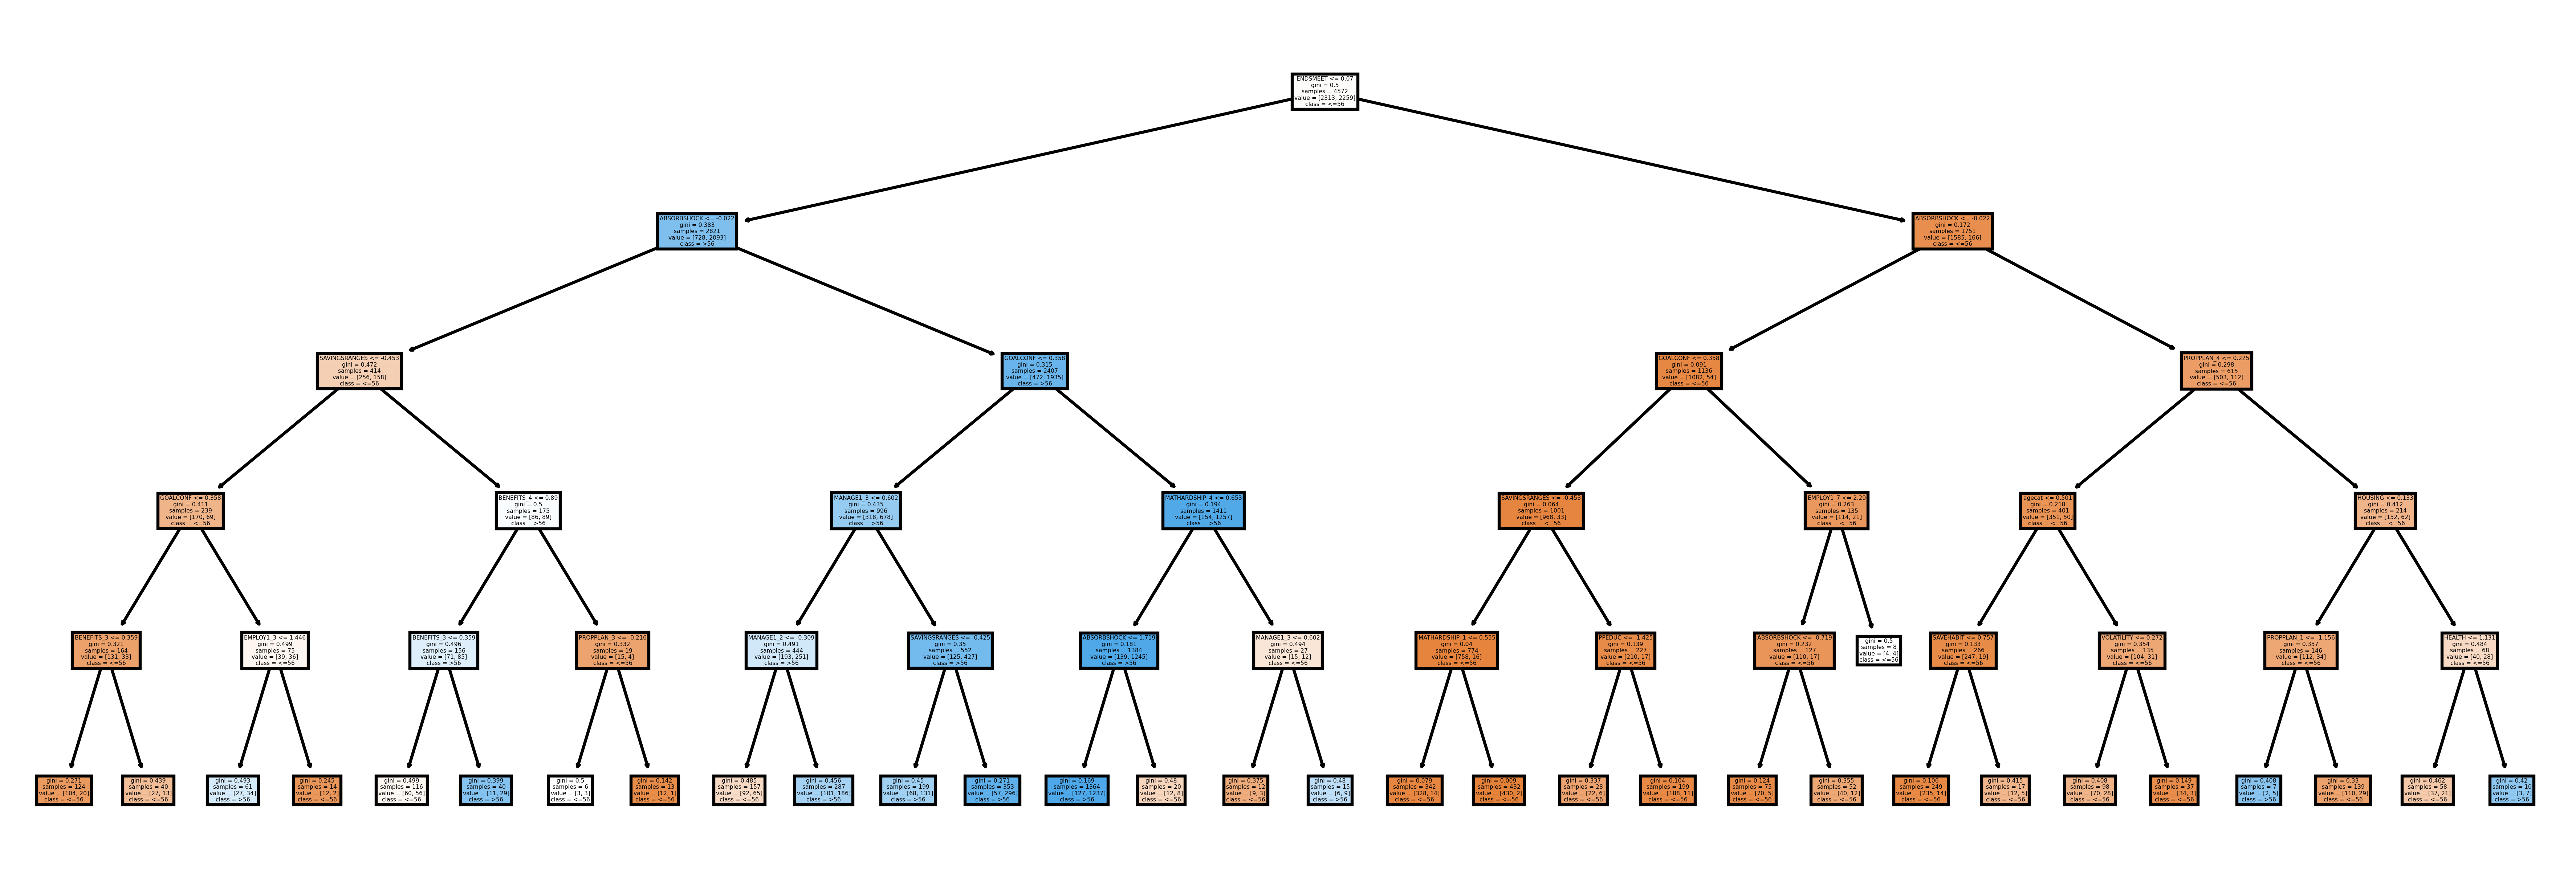

In [120]:
fig, axes = plt.subplots(nrows = 1, ncols=1, figsize=(15,5), dpi=600)
tree.plot_tree(model, feature_names=feature_names, class_names=class_labels, filled=True)
plt.savefig('d_tree_2c_1.png')

## Random Forest

In [162]:
from sklearn.ensemble import RandomForestClassifier
num_estimators = 200
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=num_estimators, random_state=78,
                                  max_depth=5, min_samples_split=10, min_samples_leaf=2)

In [163]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

C:\Users\jeffd\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [164]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [165]:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=index,
    columns=columns
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [166]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted <=56,Predicted >56
Actual <=56,653,145
Actual >56,80,647


Accuracy Score : 0.8524590163934426
Classification Report
              precision    recall  f1-score   support

        <=56       0.89      0.82      0.85       798
         >56       0.82      0.89      0.85       727

    accuracy                           0.85      1525
   macro avg       0.85      0.85      0.85      1525
weighted avg       0.86      0.85      0.85      1525



In [ ]:
# Loop to plot each estimater
# Code ref: https://stackoverflow.com/questions/40155128/plot-trees-for-a-random-forest-in-python-with-scikit-learn

fig, axes = plt.subplots(nrows=1, ncols=num_estimators, figsize=(15,5), dpi=600)
for index in range(0, num_estimators):
    tree.plot_tree(rf_model.estimators_[index],
                   feature_names = feature_names, 
                   class_names=class_labels,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
plt.savefig('rf_1.png')

In [167]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.26791880770701243, 'ENDSMEET'),
 (0.14850193126959937, 'ABSORBSHOCK'),
 (0.10648329198929624, 'GOALCONF'),
 (0.06954837555532496, 'SAVINGSRANGES'),
 (0.05840765228008046, 'MATHARDSHIP_1'),
 (0.052632077631876974, 'MANAGE1_3'),
 (0.04563329421976834, 'SAVEHABIT'),
 (0.03431421658892161, 'MATHARDSHIP_2'),
 (0.032356047866293196, 'MANAGE1_1'),
 (0.031163535748499435, 'MANAGE1_2'),
 (0.029239960652622597, 'MATHARDSHIP_4'),
 (0.016256533877951597, 'HOUSESAT'),
 (0.013321554798206608, 'MATHARDSHIP_5'),
 (0.012907813419855575, 'PRODHAVE_6'),
 (0.01251143583935395, 'PPINCIMP'),
 (0.008902585694383371, 'HOUSING'),
 (0.008619279140362635, 'agecat'),
 (0.007808126966888172, 'SCFHORIZON'),
 (0.004521350837403489, 'EMPLOY1_8'),
 (0.0040671604647535935, 'MATHARDSHIP_3'),
 (0.0038687490064117287, 'fpl'),
 (0.0031928319262934024, 'PPMARIT'),
 (0.003180091322961164, 'BENEFITS_3'),
 (0.0030055229969883695, 'HEALTH'),
 (0.0025863973120437735, 'PROPPLAN_4'),
 (0.00231019935908867, 'PROPPLAN_3'),
 (0.0